In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## want to mount the csv file from drive then this way we can use
# from google.colab import drive
# drive.mount('/content/drive')
# dataframe= pd.read_csv("/content/drive/My Drive/Data Analytics/SampleSuperstore.csv",encoding='windows-1254')

## or if you want to select the file only in runtime, need to upload this file in files folder and use it for this project
dataframe= pd.read_csv("/content/SampleSuperstore.csv",encoding='windows-1254')

In [3]:
dataframe.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
dataframe.shape

(9994, 13)

In [5]:
dataframe.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
dataframe.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
dataframe.corr()

<ipython-input-8-7707f071ecc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [9]:
import plotly.express as px
fig = px.imshow(dataframe.corr(),text_auto=True)
fig.show()

<ipython-input-9-1947f3088b82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(dataframe.corr(),text_auto=True)


<ipython-input-10-0ba626439df6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



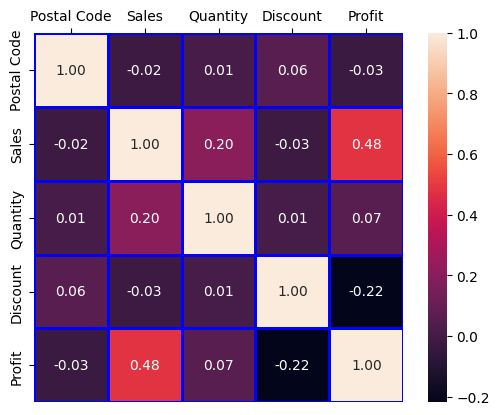

In [10]:
import seaborn as sns
ax=sns.heatmap(dataframe.corr(),annot=True,cbar=True,square=True,linecolor="blue",linewidths=1,xticklabels="auto",yticklabels="auto",fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# 1. Analysing the most profitable Region

In [11]:
dataframe["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
profitable_region=pd.DataFrame(dataframe.groupby("Region")["Profit"].sum())
profitable_region.reset_index(inplace=True)
profitable_region

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


<Axes: ylabel='Profit'>

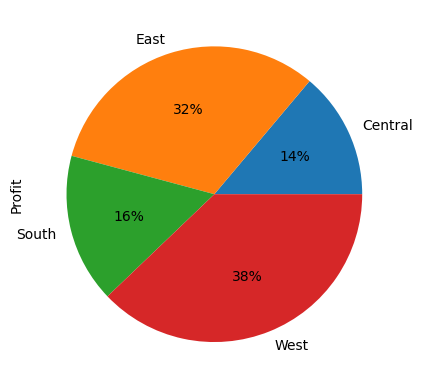

In [13]:
dataframe.groupby("Region")["Profit"].sum().plot.pie(autopct ="%1.0f%%")

After analysing the most profitable Region, I found **West Region** has highest profit of **39706.3625**


# 2.City that has the highest Sales Volume

In [14]:
city_volume = pd.DataFrame(dataframe.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values(by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


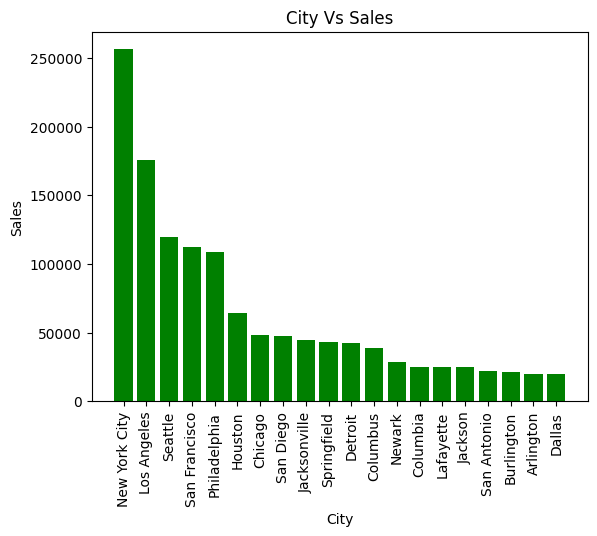

In [15]:
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20],color="green")
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.title("City Vs Sales")
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

By seeing the bargraph only we can say that **highest sales** happened in **New York Ciy**

# 3.Most Profit taken City

In [16]:
dataframe["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [17]:
len(dataframe["City"].unique())

531

In [18]:
cities_profit=pd.DataFrame(dataframe.groupby("City")["Profit"].sum())
cities_profit.reset_index(inplace=True)

In [19]:
#selecting only 10 highest profitable cities
cities_profit=cities_profit.sort_values(by="Profit",ascending=False)
cities_profit.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [20]:
fig = px.treemap(cities_profit,
                 path=['City' ,'Profit'],
                 color_continuous_scale='deep',
                 values='Profit',color='Profit')

fig.update_layout(width=1000, height=500)
fig.show()

From this Analysis we can say that more **profit** was in **New York City** itself.
From Section 2, we got to know that highest sales also in New York

# 4. Category with highest sales

In [21]:
dataframe["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [22]:
categories_sales=dataframe.groupby("Category").sum()
categories_sales.reset_index(inplace=True)
categories_sales_ass=categories_sales.sort_values(by="Profit",ascending=False)
categories_sales_ass.head(10)

<ipython-input-22-15e2b6d5cf89>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Category,Postal Code,Sales,Quantity,Discount,Profit
2,Technology,102603754,836154.0330,6939,244.40,145454.9481
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728


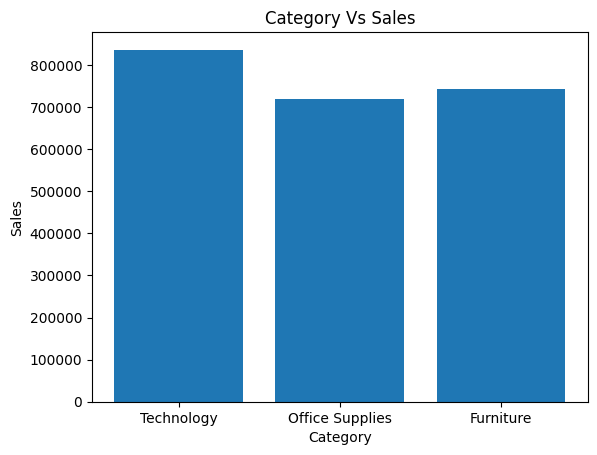

In [23]:
plt.bar(categories_sales_ass["Category"], categories_sales_ass['Sales'])
plt.xticks(categories_sales_ass.index)
plt.title("Category Vs Sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

According to this **Teconology** related category has highest **sales**

# 5. Most Profitable Category

In [24]:
dataframe["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [25]:
categories_info=pd.DataFrame(dataframe.groupby("Category")["Profit"].sum())
categories_info.reset_index(inplace=True)
categories_profit=categories_info.sort_values(by="Profit",ascending=False)
categories_profit.head(10)

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


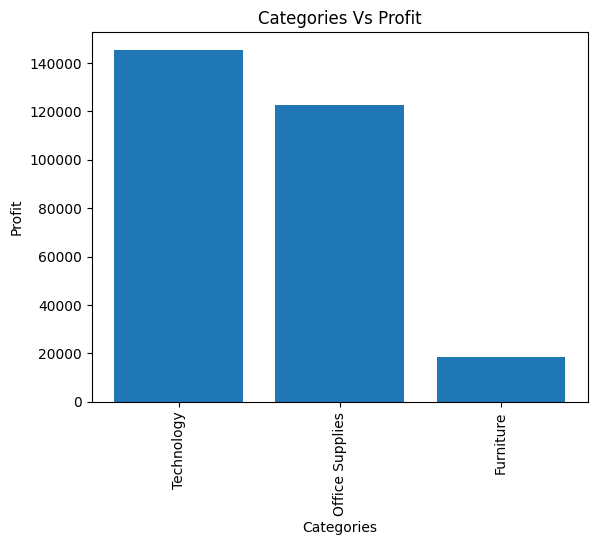

In [26]:
import matplotlib.pyplot as plt
plt.bar(categories_profit["Category"],categories_profit["Profit"])
plt.xticks(categories_profit['Category'] , rotation = "vertical")
plt.title("Categories Vs Profit")
plt.xlabel("Categories")
plt.ylabel("Profit")
plt.show()

We can easily say that **Technology** category has highest **profit** also

# 6. Most profitable cutomer segment

In [27]:
customer_segment=dataframe.groupby("Segment").sum()
customer_segment.reset_index(inplace=True)
customer_segment

<ipython-input-27-1b6d6d96cece>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


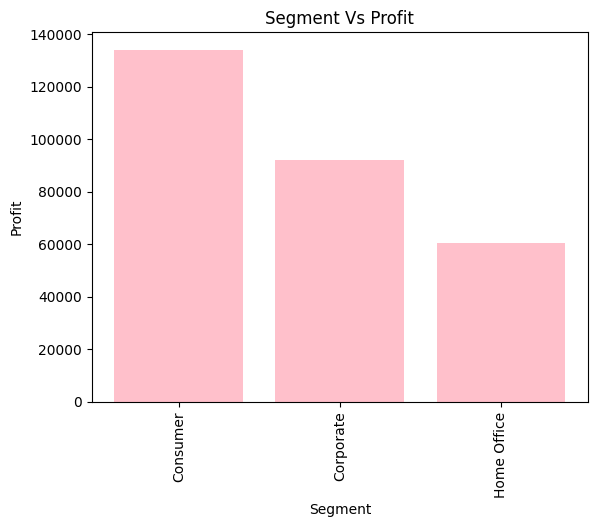

In [28]:
plt.bar(customer_segment["Segment"],customer_segment["Profit"],color="pink")
plt.xticks(customer_segment["Segment"],rotation="vertical")
plt.title("Segment Vs Profit")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

**Consumer** segment has highest **profit** compared to corporate and home office

# Result

1.   Analysing the profit
2.   Customer egmentation Result

1.   Sales Analysis
2.   Analyse the sales and Profit in Regions, category




